# Import Libraries

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
os.environ['NEPTUNE_API_TOKEN']="eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vYXBwLm5lcHR1bmUuYWkiLCJhcGlfdXJsIjoiaHR0cHM6Ly9hcHAubmVwdHVuZS5haSIsImFwaV9rZXkiOiI5NDc0ZmNhNi0wODFlLTRhYTktYjgwZS01MWJkMDMxNWJhNTAifQ=="
os.environ['NEPTUNE_PROJECT']="guilhermemg/icao-nets-training-2"
os.environ['NEPTUNE_NOTEBOOK_ID']="98a391a1-c710-40bd-aaf4-42c31862cbbe"
os.environ['NEPTUNE_NOTEBOOK_PATH']="training/exec_nas_experiment.ipynb"

In [3]:
import os
# disable tensorflow log level infos
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # show only errors

import sys
import pandas as pd

if '..' not in sys.path:
    sys.path.insert(0, '..')

In [4]:
from src.m_utils import constants as cts
from src.base.data_loaders.data_loader import DLName
from src.base.gt_loaders.gt_names import GTName
from src.exp_runner import ExperimentRunner

from src.base.experiment.dataset.dataset import Dataset
from src.base.experiment.evaluation.model_evaluator import DataSource, DataPredSelection
from src.base.experiment.training.base_models import BaseModel
from src.base.experiment.training.optimizers import Optimizer

from src.m_utils.stl_approach import STLApproach
from src.m_utils.mtl_approach import MTLApproach
from src.m_utils.nas_mtl_approach import NAS_MTLApproach

from src.nas.v3.nas_algorithm import NASAlgorithm
from src.nas.v3.mlp_search_space import MLPSearchSpace

 ==> Restrict GPU memory growth: True


# Start Network runner

In [5]:
DATASET = Dataset.CELEB_A
APPROACH = NAS_MTLApproach.APPROACH_3

kwargs = { 
    'use_neptune': True,
    'exp_params' : {
        'name': 'NAS experiment',
        'description': 'NAS with Approach 3',
        'tags': [f'{DATASET.value["name"]}', 'nas', 'nas_approach_3', 'no_use_predictor'],
        'src_files': ["../src/**/*.py"]
    },
    'properties': {
        'approach': APPROACH,
        'dataset': DATASET,
        'tasks': DATASET.value['tasks'],
        'balance_input_data': False,
        'train_model': True,
        'save_trained_model': True,
        'exec_nas': True,
        'orig_model_experiment_id': '',
        'sample_training_data': False,
        'sample_prop': 1.0
    },
    'nas_params': {
        'architecture_training_epochs': 2,     # n_epochs for training proposed architecture
        'total_num_proposed_architectures': 15,
        'nas_algorithm': NASAlgorithm.EVOLUTION,
        'nas_search_space': MLPSearchSpace.SS_1
    },
    'controller_params': {
        'controller_lstm_dim': 100,
        'controller_optimizer': Optimizer.ADAM,
        'controller_learning_rate': 0.01,
        'controller_decay': 0.1,
        'controller_momentum': 0.0,
        'controller_use_predictor': False,
        'controller_loss_alpha': 0.9,
        'controller_training_epochs': 5,
        'controller_sampling_epochs': 6,
        'controller_batch_size': 3
    },
    'mlp_params': {
        'max_architecture_length': 5,
        'min_task_group_size': 3,
        'mlp_base_model': BaseModel.MOBILENET_V2,
        'mlp_n_epochs': 50,
        'mlp_batch_size': 64,
        'mlp_early_stopping': 50,
        'mlp_optimizer': Optimizer.ADAMAX,
        'mlp_learning_rate': 1e-3,
        'mlp_decay': 0.0,
        'mlp_momentum': 0.0,
        'mlp_dropout': 0.3,
        'mlp_loss_function': 'sparse_categorical_crossentropy',
        'mlp_one_shot': False
    }
}


runner = ExperimentRunner(**kwargs)

-------------------- Init ExperimentRunner -------------------
---------------------------
Parent Process ID: 9502
Process ID: 605574
---------------------------
-----
Use Neptune:  True
-----
-------------------
Args: 
{'controller_params': {'controller_batch_size': 3,
                       'controller_decay': 0.1,
                       'controller_learning_rate': 0.01,
                       'controller_loss_alpha': 0.9,
                       'controller_lstm_dim': 100,
                       'controller_momentum': 0.0,
                       'controller_optimizer': <Optimizer.ADAM: 'Adam'>,
                       'controller_sampling_epochs': 6,
                       'controller_training_epochs': 5,
                       'controller_use_predictor': False},
 'exp_params': {'description': 'NAS with Approach 3',
                'name': 'NAS experiment',
                'src_files': ['../src/**/*.py'],
                'tags': ['celeb_a',
                         'nas',
            

# Load Data

In [6]:
runner.load_training_data()

-------------------- load training data -------------------
Loading data
TrainData.shape: (162770, 42)
ValidationData.shape: (19867, 42)
TestData.shape: (19962, 42)
Data loaded


In [7]:
runner.sample_training_data()

-------------------- sample training data -------------------
Not applying subsampling in training data!


In [8]:
runner.train_data.head()

,img_name,split,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,/home/guilherme/data1/Dropbox/Link to Desktop/...,train,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,/home/guilherme/data1/Dropbox/Link to Desktop/...,train,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,/home/guilherme/data1/Dropbox/Link to Desktop/...,train,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,/home/guilherme/data1/Dropbox/Link to Desktop/...,train,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0
4,/home/guilherme/data1/Dropbox/Link to Desktop/...,train,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


# Data Generators

In [9]:
runner.setup_data_generators()

-------------------- setup data generators -------------------
Starting data generators
Found 162770 validated image filenames.
Found 19867 validated image filenames.
Found 19962 validated image filenames.
TOTAL: 202599

Logging class indices
 .. MTL model not logging class indices!

Using benchmarking dataset. Not logging class labels!


# Setup Experiment

In [10]:
runner.setup_experiment()

-------------------- create experiment -------------------
Setting up neptune experiment
Neptune experiment setup done!


# Labels Distribution

In [11]:
%%capture
runner.summary_labels_dist()

# Neural Architecture Search - v3

In [12]:
best_arch = runner.run_neural_architecture_search_v3()

-------------------- run neural architecture search -------------------
 -- Using search space: ss_1
 -- Using NAS algorithm: NASAlgorithm.EVOLUTION

Model path:  trained_model
----
Checking model existence locally...
Training a new model! Not checking model existence
----
------------------------------
Checking GPU availability
 ..GPU is available!
------------------------------
  New Controller Epoch | Feedback ID: 1 | Feedback DNA: DNA([0, 4, 1, 4])
----------------------------------------------------------------------
------------------------------------------------------------
 -- Architecture 1: {'n_denses_0': 1, 'n_denses_1': 5, 'n_denses_2': 2, 'n_denses_3': 5}
Creating model...
Model created
Training MOBILENET_V2 network
 .. Not fine tuning base model...
  .. Total params: 5,916,944
  .. Trainable params: 3,658,960
  .. Non-trainable params: 2,257,984

Epoch 00001: val_loss improved from inf to 1.25814, saving model to training/training_ckpt/best_model.hdf5


/home/guilherme/data2/anaconda3/envs/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '



Epoch 00002: val_loss improved from 1.25814 to 0.92458, saving model to training/training_ckpt/best_model.hdf5
..Loading best model
..Checkpoint weights loaded
Testing Trained Model
Predicting labels....
311/311 [==============================] - 29s 88ms/step
Prediction finished!
  Task  0: 5_o_Clock_Shadow | EER_mean: 0.09720 | EER_interp: 0.09730 | ACC: 0.90270
  Task  1: Arched_Eyebrows | EER_mean: 0.16360 | EER_interp: 0.16360 | ACC: 0.83640
  Task  2: Attractive      | EER_mean: 0.18180 | EER_interp: 0.18170 | ACC: 0.81830
  Task  3: Bags_Under_Eyes | EER_mean: 0.20570 | EER_interp: 0.20580 | ACC: 0.79430
  Task  4: Bald            | EER_mean: 0.02650 | EER_interp: 0.02660 | ACC: 0.97350
  Task  5: Bangs           | EER_mean: 0.05880 | EER_interp: 0.05880 | ACC: 0.94120
  Task  6: Big_Lips        | EER_mean: 0.28810 | EER_interp: 0.28810 | ACC: 0.71190
  Task  7: Big_Nose        | EER_mean: 0.19870 | EER_interp: 0.19860 | ACC: 0.80140
  Task  8: Black_Hair      | EER_mean: 0.102

# Create Model with Best Architecture Found

In [13]:
runner.create_model(best_arch)

-------------------- create model -------------------
Creating model...
Model created


# Visualize Model

In [14]:
%%capture
runner.visualize_model(outfile_path=f"training/figs/nas/nas_model_{APPROACH.name}.png")

In [15]:
%%capture
runner.model_summary()

# Training Model

In [16]:
runner.train_model()

-------------------- train model -------------------
Training MOBILENET_V2 network
 .. Not fine tuning base model...
  .. Total params: 5,916,944
  .. Trainable params: 3,658,960
  .. Non-trainable params: 2,257,984
Epoch 1/50
2543/2543 [==============================] - 762s 295ms/step - loss: 0.8338 - 5_o_Clock_Shadow_loss: 0.1558 - Arched_Eyebrows_loss: 0.3485 - Attractive_loss: 0.3860 - Bags_Under_Eyes_loss: 0.3434 - Bald_loss: 0.0305 - Bangs_loss: 0.1185 - Big_Lips_loss: 0.4686 - Big_Nose_loss: 0.3634 - Black_Hair_loss: 0.2453 - Blond_Hair_loss: 0.1274 - Blurry_loss: 0.0993 - Brown_Hair_loss: 0.3074 - Bushy_Eyebrows_loss: 0.2337 - Chubby_loss: 0.1226 - Double_Chin_loss: 0.1005 - Eyeglasses_loss: 0.0283 - Goatee_loss: 0.0834 - Gray_Hair_loss: 0.0616 - Heavy_Makeup_loss: 0.2044 - High_Cheekbones_loss: 0.3079 - Male_loss: 0.0744 - Mouth_Slightly_Open_loss: 0.1942 - Mustache_loss: 0.0830 - Narrow_Eyes_loss: 0.2648 - No_Beard_loss: 0.1232 - Oval_Face_loss: 0.5047 - Pale_Skin_loss: 0.09

/home/guilherme/data2/anaconda3/envs/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 2/50
2543/2543 [==============================] - 746s 294ms/step - loss: 0.7456 - 5_o_Clock_Shadow_loss: 0.1359 - Arched_Eyebrows_loss: 0.3131 - Attractive_loss: 0.3624 - Bags_Under_Eyes_loss: 0.3154 - Bald_loss: 0.0245 - Bangs_loss: 0.1006 - Big_Lips_loss: 0.4467 - Big_Nose_loss: 0.3356 - Black_Hair_loss: 0.2194 - Blond_Hair_loss: 0.1122 - Blurry_loss: 0.0901 - Brown_Hair_loss: 0.2791 - Bushy_Eyebrows_loss: 0.1971 - Chubby_loss: 0.1053 - Double_Chin_loss: 0.0874 - Eyeglasses_loss: 0.0151 - Goatee_loss: 0.0686 - Gray_Hair_loss: 0.0506 - Heavy_Makeup_loss: 0.1783 - High_Cheekbones_loss: 0.2811 - Male_loss: 0.0499 - Mouth_Slightly_Open_loss: 0.1568 - Mustache_loss: 0.0696 - Narrow_Eyes_loss: 0.2396 - No_Beard_loss: 0.1015 - Oval_Face_loss: 0.4782 - Pale_Skin_loss: 0.0820 - Pointy_Nose_loss: 0.4586 - Receding_Hairline_loss: 0.1378 - Rosy_Cheeks_loss: 0.1133 - Sideburns_loss: 0.0569 - Smiling_loss: 0.1761 - Straight_Hair_loss: 0.3256 - Wavy_Hair_loss: 0.3173 - Wearing_Earrings_loss:

# Plots

-------------------- draw training history -------------------


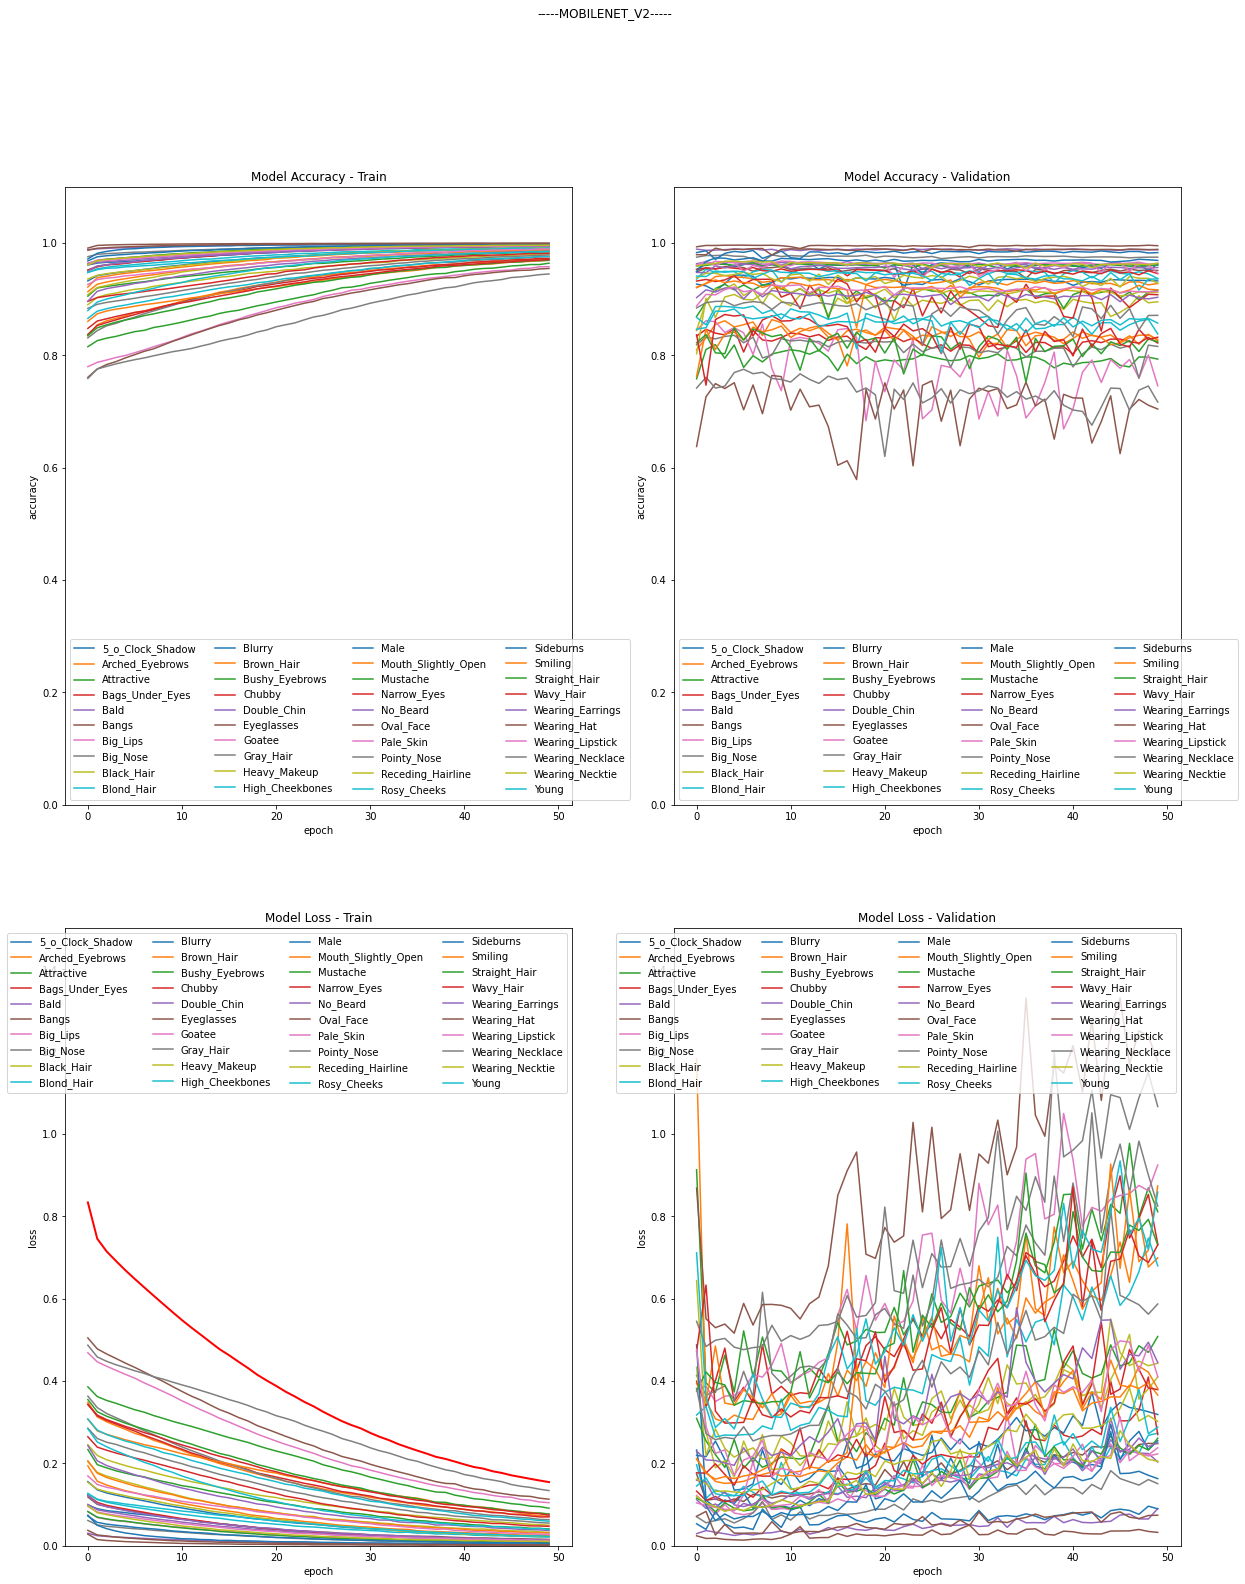

In [17]:
runner.draw_training_history()

# Load Best Model

In [18]:
runner.load_best_model()

-------------------- load best model -------------------
..Loading best model
..Checkpoint weights loaded


# Saving Trained Model

In [19]:
runner.save_model()

-------------------- save model -------------------
Saving model


/home/guilherme/data2/anaconda3/envs/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


INFO:tensorflow:Assets written to: trained_model/assets
..Model saved
...Model path: trained_model
Saving model to neptune
 ..Uploading file trained_model.zip
Model saved into Neptune
Saving process finished


# Test Trained Model

## Validation Split

In [20]:
runner.set_model_evaluator_data_src(DataSource.VALIDATION)
runner.test_model(verbose=False)

Testing Trained Model
Predicting labels....
311/311 [==============================] - 28s 83ms/step
Prediction finished!
  Task  0: 5_o_Clock_Shadow | EER_mean: 0.09080 | EER_interp: 0.09080 | ACC: 0.90920
  Task  1: Arched_Eyebrows | EER_mean: 0.15410 | EER_interp: 0.15400 | ACC: 0.84600
  Task  2: Attractive      | EER_mean: 0.18230 | EER_interp: 0.18220 | ACC: 0.81770
  Task  3: Bags_Under_Eyes | EER_mean: 0.19920 | EER_interp: 0.19920 | ACC: 0.80080
  Task  4: Bald            | EER_mean: 0.02950 | EER_interp: 0.02940 | ACC: 0.97050
  Task  5: Bangs           | EER_mean: 0.05520 | EER_interp: 0.05520 | ACC: 0.94490
  Task  6: Big_Lips        | EER_mean: 0.28450 | EER_interp: 0.28450 | ACC: 0.71550
  Task  7: Big_Nose        | EER_mean: 0.20670 | EER_interp: 0.20680 | ACC: 0.79330
  Task  8: Black_Hair      | EER_mean: 0.10350 | EER_interp: 0.10320 | ACC: 0.89660
  Task  9: Blond_Hair      | EER_mean: 0.06110 | EER_interp: 0.06120 | ACC: 0.93890
  Task 10: Blurry          | EER_mean

## Test Split

In [21]:
runner.set_model_evaluator_data_src(DataSource.TEST)
runner.test_model(verbose=False)

Testing Trained Model
Predicting labels....
312/312 [==============================] - 29s 93ms/step
Prediction finished!
  Task  0: 5_o_Clock_Shadow | EER_mean: 0.08100 | EER_interp: 0.08080 | ACC: 0.91900
  Task  1: Arched_Eyebrows | EER_mean: 0.17090 | EER_interp: 0.17080 | ACC: 0.82910
  Task  2: Attractive      | EER_mean: 0.16880 | EER_interp: 0.16880 | ACC: 0.83120
  Task  3: Bags_Under_Eyes | EER_mean: 0.17840 | EER_interp: 0.17840 | ACC: 0.82160
  Task  4: Bald            | EER_mean: 0.02840 | EER_interp: 0.02830 | ACC: 0.97180
  Task  5: Bangs           | EER_mean: 0.05500 | EER_interp: 0.05500 | ACC: 0.94510
  Task  6: Big_Lips        | EER_mean: 0.30960 | EER_interp: 0.30960 | ACC: 0.69040
  Task  7: Big_Nose        | EER_mean: 0.21120 | EER_interp: 0.21120 | ACC: 0.78880
  Task  8: Black_Hair      | EER_mean: 0.11270 | EER_interp: 0.11270 | ACC: 0.88730
  Task  9: Blond_Hair      | EER_mean: 0.06010 | EER_interp: 0.06020 | ACC: 0.93990
  Task 10: Blurry          | EER_mean

# Visualize Model Classification

# Finishing Experiment Manager

In [22]:
runner.finish_experiment()

-------------------- finish experiment -------------------
Finishing Neptune
Shutting down background jobs, please wait a moment...
Done!
Waiting for the remaining 101 operations to synchronize with Neptune. Do not kill this process.
All 101 operations synced, thanks for waiting!
Explore the metadata in the Neptune app:
https://app.neptune.ai/guilhermemg/icao-nets-training-2/e/ICAO-469
